In [1]:
from astropy.table import Table
from src.constants import DEMO_DATA_DIR

baseline3 = DEMO_DATA_DIR / "trace_3m.csv"
baseline17 = DEMO_DATA_DIR / "trace_17m.csv"

baseline3 = Table.read(baseline3)
baseline17 = Table.read(baseline17)

# 3m

In [78]:
import numpy as np

time_strs = np.array(baseline3["\ufeffTime"])
(minutes, seconds) = zip(*(s.split(":") for s in time_strs))
minutes = np.array(minutes, dtype=float)
seconds = np.array(seconds, dtype=float)
total_seconds = minutes * 60 + seconds

mono_seconds = []
sec0 = 0
for sec in total_seconds:
    while sec < sec0:
        sec += 60 * 60
    sec0 = sec
    mono_seconds.append(sec)

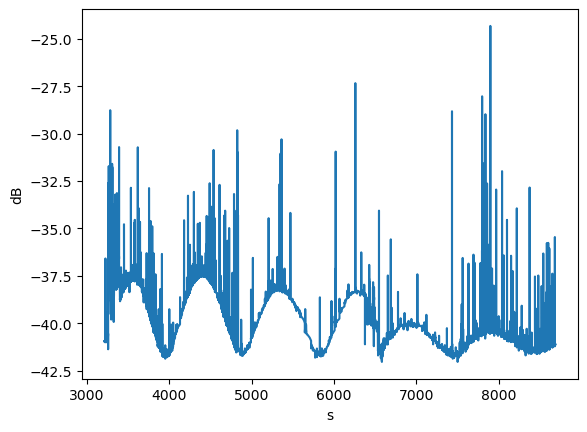

In [79]:
import matplotlib.pyplot as plt

seconds = mono_seconds
raw_dB = baseline3["Measurement 1 (dBm)"]
raw_intensity = 10 ** (raw_dB / 10)

# plt.plot(mono_seconds, raw_intensity)
plt.plot(mono_seconds, raw_dB)
plt.xlabel("s")
plt.ylabel("dB")
plt.show()

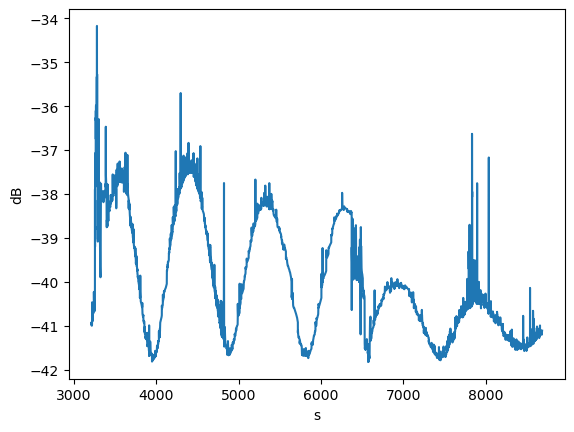

In [80]:
from scipy.signal import medfilt

clean_dB = medfilt(raw_dB, kernel_size=9)

plt.plot(mono_seconds, clean_dB)
plt.xlabel("s")
plt.ylabel("dB")
plt.show()

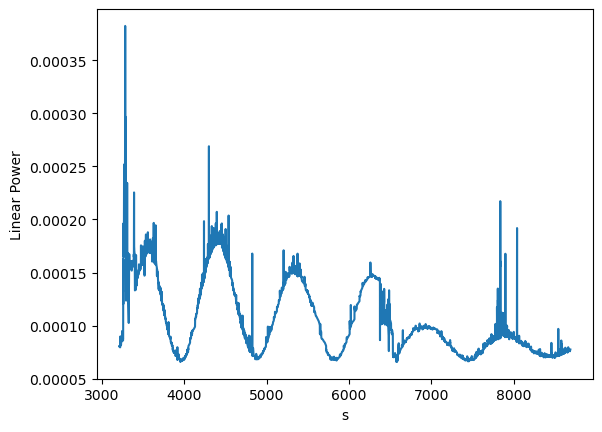

In [81]:
clean_intensity = 10 ** (clean_dB / 10)

plt.plot(mono_seconds, clean_intensity)
plt.xlabel("s")
plt.ylabel("Linear Power")
plt.show()

The period is 200.0 s


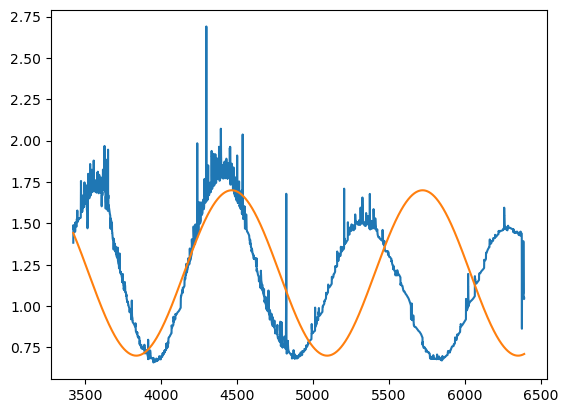

In [82]:
# Manual Sine Fit

x = np.array(seconds[2000:30000])
y = clean_intensity[2000:30000] * 10000

sine = lambda x, x0, w, A, c: A * np.sin(w * (x - x0)) + c

# change w here!
w = 0.005

plt.plot(x, y)
plt.plot(x, sine(x, 4150, w, 0.5, 1.2))
print(f"The period is {1/w} s")

# 17m

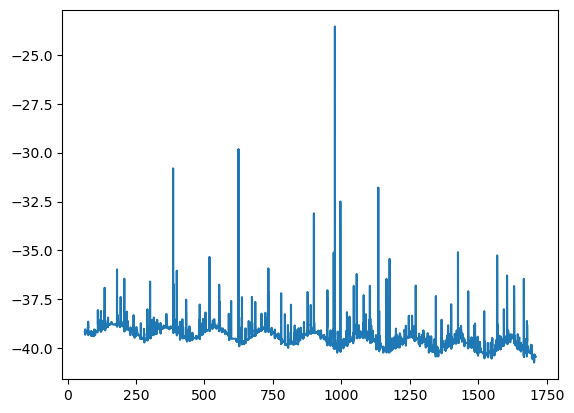

In [52]:
import numpy as np

time_strs = np.array(baseline17["\ufeffTime"])
(minutes, seconds) = zip(*(s.split(":") for s in time_strs))
minutes = np.array(minutes, dtype=float)
seconds = np.array(seconds, dtype=float)
total_seconds = minutes * 60 + seconds
raw_dB = baseline17["Measurement 1 (dBm)"]
plt.plot(total_seconds, raw_dB)

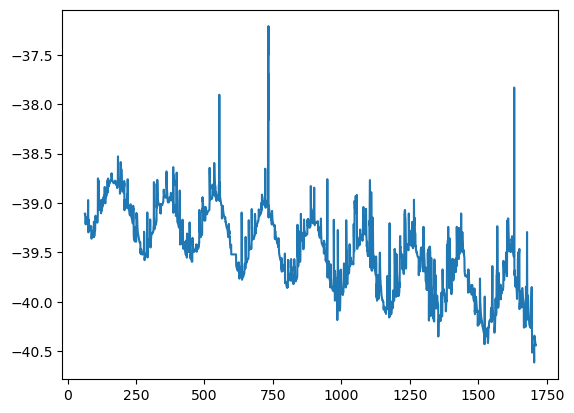

In [55]:
clean_dB = medfilt(raw_dB, kernel_size=9)
plt.plot(total_seconds, clean_dB)

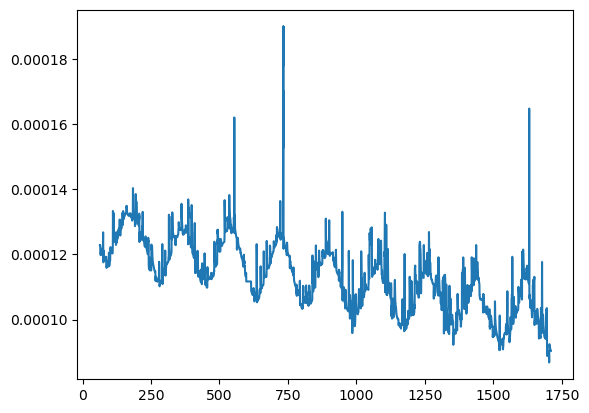

In [56]:
clean_intensity = 10 ** (clean_dB / 10)
plt.plot(total_seconds, clean_intensity)

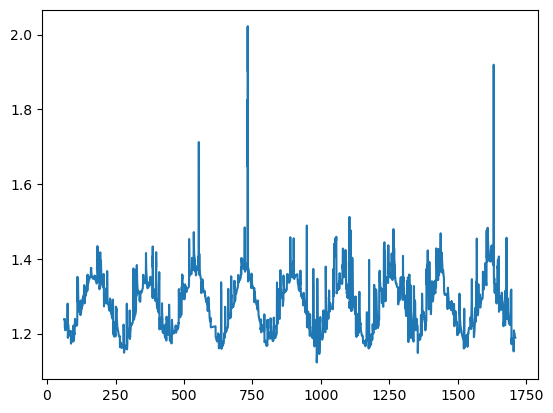

In [64]:
x = total_seconds
y = clean_intensity + 0.00002 * (x / 1200)
y = y * 10000
plt.plot(x, y)

The period is 33.333333333333336 s


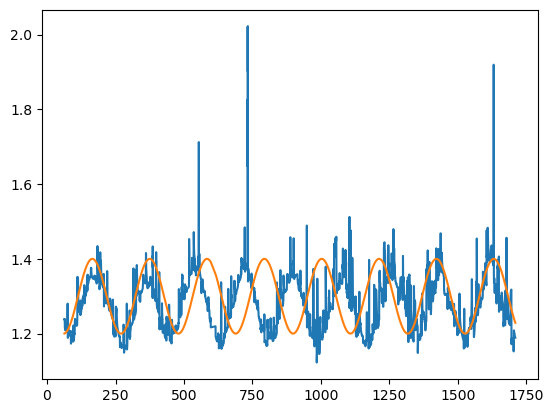

In [ ]:
sine = lambda x, x0, w, A, c: A * np.sin(w * (x - x0)) + c

# change w here!
w = 0.03

plt.plot(x, y)
plt.plot(x, sine(x, 113, w, 0.1, 1.3))
print(f"The period is {1/w} s")